1. Import Libraries and Data</br>
Let's start with importing libraries, reading a file with data to a Pandas Dataframe and cheking basic information about data.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [26]:
df = pd.read_csv('beer_reviews.csv')

In [81]:
df.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen   10325.0        47986  
1                Red Moon   10325.0        48213  
2  Black Horse Black Beer   10325.0        48215  
3              Sausa Pils   10325.0        47969  
4           Cauldron DIPA    1075.0        64883

2. Some information about dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


The dataset consists of 1586614 entries, each entry is one review and shows what users think about such beer features as taste, appearance, aroma, palate, and overall impression. 
The dataset looks pretty good, but there are missing values in Brewery_name, Review_profilename, and Beer_abv columns.

In [61]:
print('Number of breweries: ',df['brewery_id'].nunique())
print('Number of beers: ', df['beer_beerid'].nunique())
print('Number of beer styles: ', df['beer_style'].nunique())
print('Number of reviewers:', df['review_profilename'].nunique())
print('Average overall impression: ', df['review_overall'].mean())

Number of breweries:  5840
Number of beers:  66055
Number of beer styles:  104
Number of reviewers: 33387
Average overall impression:  3.8155808533140387


3. Work with missing data

In [35]:
# let's look at missing values in Brewery_name column: there are 15 entries about 2 breweries
# If brewery_name will be important further, then just replace NaN with "Missing brewery 1" and "Missing brewery 2"
df[pd.isna(df['brewery_name'])].shape

(15, 13)

In [36]:
# Missing values in Review_profilename: 348 entries
df[pd.isna(df['review_profilename'])].shape

(348, 13)

Missing values in Brewery_name and Review_profilename don't look important for now, but missing value for Beer_abv might be more interesting to work with. 
First thing that comes to my ming is to look is there are reviews for the same beers but with actual value for abv.

In [42]:
#Missing values in Beer_abv: 67785 entries
miss = df[pd.isna(df['beer_abv'])]

#We could try and find abv for them inother reviews
miss_beerid = miss['beer_beerid'].unique().tolist()

#Let's look through all dataset and try to find reviews for this beers with not missing abv
xx = df[(df['beer_beerid'].isin(miss_beerid)) & (~df['beer_abv'].isnull())]
xx.shape

(0, 13)

Ok, there is not any other review for any of this beers with nonmissing abv
Let's try another thing: calculate mean/median abv for beerstyle and fill missing values, but first let's look at Beer_abv distribution to decide what statistic to use

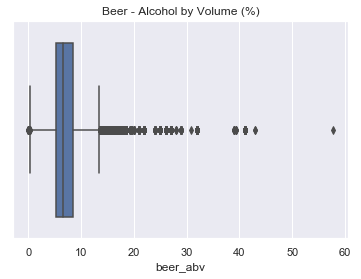

In [43]:
sns.boxplot(x=df['beer_abv'])
plt.title('Beer - Alcohol by Volume (%)')
plt.show()

As we can see from boxplot average abv for all beerstyles is 7%, and there are enough beers with really high abv that could count as outliers and affect average value, that's why I will use median value for each beer style to fill missing values.

In [44]:
# Fill the missing values with median
df['beer_abv'] = df.groupby(['beer_style']).transform(lambda x: x.fillna(x.median()))

4. Univariate analysis</br>
Let's look at how users evaluated beer

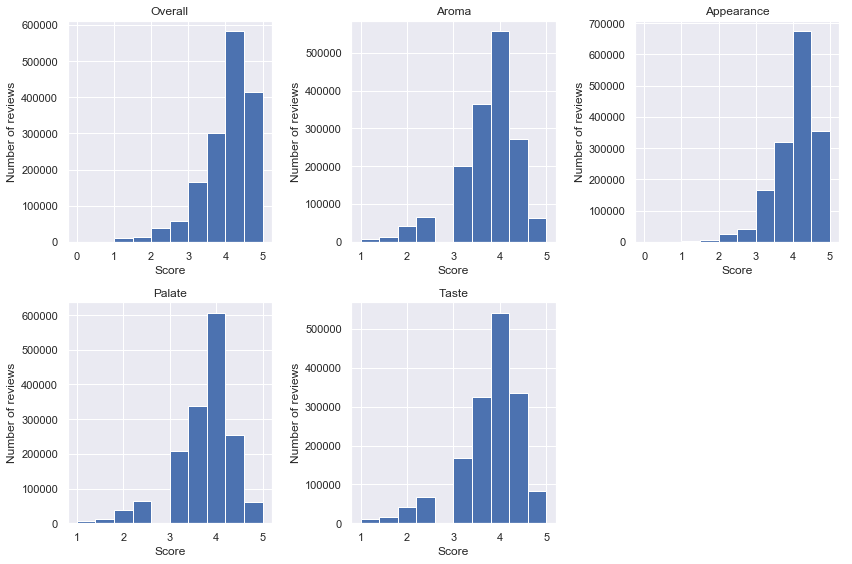

In [77]:
plt.figure(figsize=(12,8))

#Draw first suplot
plt.subplot(231)
plt.hist(df['review_overall'])
plt.title("Overall")
plt.xlabel("Score")
plt.ylabel("Number of reviews")

#Draw second subplot    
plt.subplot(232)
plt.hist(df['review_aroma'])
plt.title("Aroma")
plt.xlabel("Score")
plt.ylabel("Number of reviews")

#Draw third subplot    
plt.subplot(233)
plt.hist(df['review_appearance'])
plt.title("Appearance")
plt.xlabel("Score")
plt.ylabel("Number of reviews")

#Draw fourth subplot    
plt.subplot(234)
plt.hist(df['review_palate'])
plt.title("Palate")
plt.xlabel("Score")
plt.ylabel("Number of reviews")

#Draw fifth subplot    
plt.subplot(235)
plt.hist(df['review_taste'])
plt.title("Taste")
plt.xlabel("Score")
plt.ylabel("Number of reviews")

plt.tight_layout()
plt.show()

Distributions are clearly skewed. We can notice that even when a person didn't like aroma or taste their overall review is not really bad.

Let's group reviews by beer style and look at average impressions and relationships between different beer characteristics.

In [79]:
scores = df[['brewery_name', 'beer_style', 'beer_name','review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste'
             ]]
scores = scores.groupby(['beer_style']).mean().reset_index()
scores.head()

beer_style  review_overall  review_aroma  \
0                     Altbier        3.824054      3.624015   
1      American Adjunct Lager        3.001659      2.480211   
2    American Amber / Red Ale        3.781010      3.627254   
3  American Amber / Red Lager        3.564601      3.213296   
4         American Barleywine        3.896756      4.019343   

   review_appearance  review_palate  review_taste  
0           3.809327       3.713086      3.744865  
1           2.788546       2.735471      2.683112  
2           3.810190       3.656696      3.696127  
3           3.527494       3.354795      3.373590  
4           4.036535       3.996521      4.042633

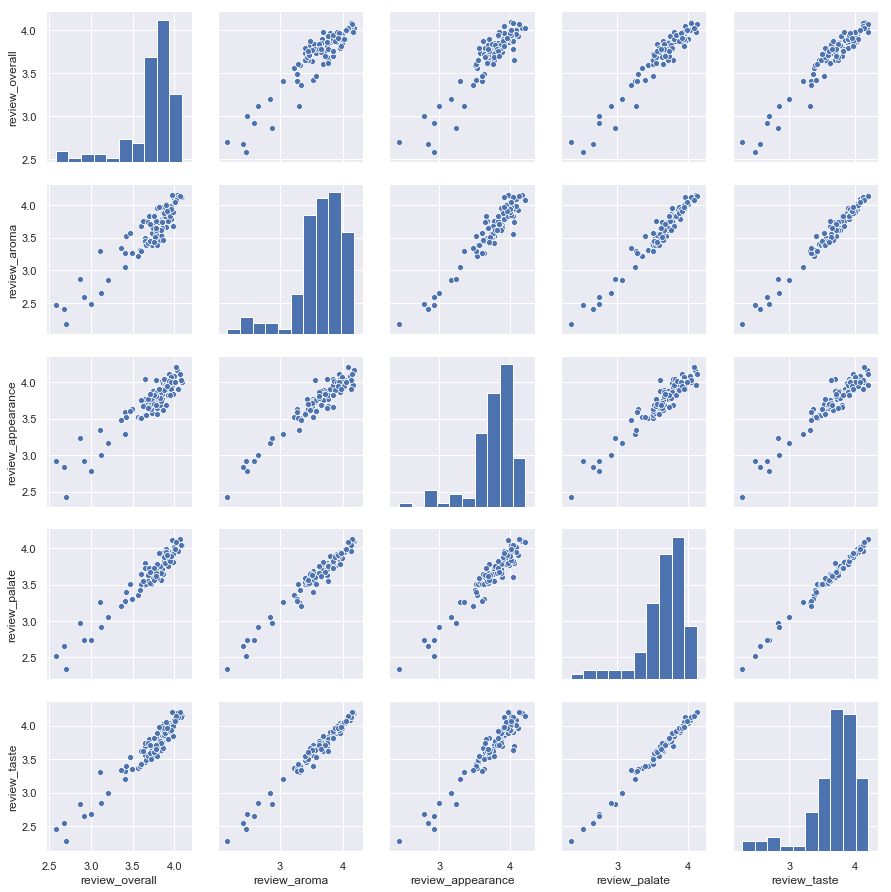

In [64]:
sns.pairplot(scores)

There are clearly linear relationships between variables. It looks logical, the better taste/aroma/appearance, the better overall impression.

5. Beer styles exploration

Among beerstyle with the lowest overall_review are mostly lagers and other low alcohol drinks like Rice Lager, Kvass, Malt Liqour. 10 the highest rated beer styles include Stouts and Ales, Gueuze and Lambic.

In [105]:
#10 least liked beer styles
overall = df[['brewery_name', 'beer_style', 'beer_name','review_overall']]
ov_style = overall.groupby(['beer_style']).mean().reset_index()
ov_style.sort_values('review_overall').head(10)

beer_style  review_overall
77        Low Alcohol Beer        2.578268
13    American Malt Liquor        2.678854
76             Light Lager        2.698833
54       Euro Strong Lager        2.862518
64                Happoshu        2.914938
1   American Adjunct Lager        3.001659
34              Chile Beer        3.113298
69     Japanese Rice Lager        3.119987
53         Euro Pale Lager        3.202775
72                   Kvass        3.355219

In [106]:
#10 most liked beer styles
ov_style.sort_values('review_overall', ascending=False).head(10)

beer_style  review_overall
20                  American Wild Ale        4.093262
63                             Gueuze        4.086287
86                   Quadrupel (Quad)        4.071630
75                 Lambic - Unblended        4.048923
11   American Double / Imperial Stout        4.029820
89             Russian Imperial Stout        4.023084
100                        Weizenbock        4.007969
9      American Double / Imperial IPA        3.998017
58                   Flanders Red Ale        3.992722
90                           Rye Beer        3.981737

In [107]:
ov_style.describe()

review_overall
count      104.000000
mean         3.732231
std          0.301983
min          2.578268
25%          3.679388
50%          3.821994
75%          3.901489
max          4.093262

In [109]:
#How many disinct beers are for each style
style_beers = df[['beer_style', 'beer_beerid']].drop_duplicates()
style_beers = style_beers.groupby(['beer_style']).count().reset_index().sort_values(by=['beer_beerid'], ascending=False)
style_beers.head(10)

beer_style  beer_beerid
12                    American IPA         3611
14         American Pale Ale (APA)         3349
2         American Amber / Red Ale         2512
17                 American Porter         2198
60          Fruit / Vegetable Beer         1837
65                      Hefeweizen         1724
9   American Double / Imperial IPA         1549
43                  English Bitter         1488
53                 Euro Pale Lager         1479
18                  American Stout         1427

In [110]:
style_beers.tail(10)

beer_style  beer_beerid
88                       Roggenbier           71
75               Lambic - Unblended           71
41                          Eisbock           69
32                          Braggot           66
69              Japanese Rice Lager           55
72                            Kvass           44
62                             Gose           33
91                            Sahti           28
28  Bière de Champagne / Bière Brut           20
56                             Faro           19

In [111]:
style_beers.describe()

beer_beerid
count   104.000000
mean    635.144231
std     635.949125
min      19.000000
25%     196.750000
50%     476.000000
75%     816.250000
max    3611.000000

In [112]:
#What beerstyle has the most/least reviews
style_reviews = df.groupby('beer_style').count()[['review_overall']].reset_index().sort_values(by=['review_overall'], ascending=False)
style_reviews.head(10)

beer_style  review_overall
12                      American IPA          117586
9     American Double / Imperial IPA           85977
14           American Pale Ale (APA)           63469
89            Russian Imperial Stout           54129
11  American Double / Imperial Stout           50705
17                   American Porter           50477
2           American Amber / Red Ale           45751
25           Belgian Strong Dark Ale           37743
60            Fruit / Vegetable Beer           33861
19               American Strong Ale           31945

In [113]:
style_reviews.tail(10)

beer_style  review_overall
75               Lambic - Unblended            1114
91                            Sahti            1061
28  Bière de Champagne / Bière Brut            1046
32                          Braggot            1040
48            English Pale Mild Ale             700
62                             Gose             686
56                             Faro             609
88                       Roggenbier             466
72                            Kvass             297
64                         Happoshu             241

In [114]:
style_reviews.describe()

review_overall
count      104.000000
mean     15255.903846
std      17830.331881
min        241.000000
25%       3952.750000
50%       9978.000000
75%      19644.750000
max     117586.000000

6. Beers

We've already seen that this dataset includes very strong beers. So let's see Top10 the most strongest beers.</br>
The strongest beers is "Schorschbräu Schorschbock 57%", it has 57.70 abv. The same brewery "Schorschbräu" brews other the strongest beers as "Schorschbräu Schorschbock 43%", "Schorschbräu Schorschbock 40%", and "Schorschbräu Schorschbock 31%". "BrewDog" brewery has 3 beers among the strongest with 41, 32 and 28 abv.

In [16]:
#Top10 the most strongest beers
strong_beers = df.sort_values(by=['beer_abv'], ascending=False)[['brewery_name', 'beer_style', 'beer_name', 'beer_abv']]
strong_beers.drop_duplicates().head(10)

brewery_name  \
12919                                         Schorschbräu   
12939                                         Schorschbräu   
746385                                             BrewDog   
12941                                         Schorschbräu   
996153                                 De Struise Brouwers   
748356                                             BrewDog   
12918                                         Schorschbräu   
1042328  Hair of the Dog Brewing Company / Brewery and ...   
746421                                             BrewDog   
293821                  Boston Beer Company (Samuel Adams)   

                               beer_style                      beer_name  \
12919                             Eisbock  Schorschbräu Schorschbock 57%   
12939                             Eisbock  Schorschbräu Schorschbock 43%   
746385     American Double / Imperial IPA             Sink The Bismarck!   
12941                             Eisbock  Schorschbräu Schorschbock 40%   
996153   American Double / Imperial Stout     Black Damnation VI - Messy   
748356   American Double / Imperial Stout       Tactical Nuclear Penguin   
12918                             Eisbock  Schorschbräu Schorschbock 31%   
1042328                English Barleywine                           Dave   
746421            Belgian Strong Pale Ale                     Ghost Deer   
293821                American Strong Ale           Samuel Adams Utopias   

         beer_abv  
12919       57.70  
12939       43.00  
746385      41.00  
12941       39.44  
996153      39.00  
748356      32.00  
12918       30.86  
1042328     29.00  
746421      28.00  
293821      27.00

7. Breweries

In [95]:
#Which brewery has the biggest number of beers, which smallest
br = df[['brewery_name', 'beer_beerid']].drop_duplicates()
br_count = br.groupby(['brewery_name']).count().reset_index().sort_values(by=['beer_beerid'], ascending=False)
br_count.head(10)

brewery_name  beer_beerid
4473    Rock Bottom Restaurant & Brewery          878
2960  John Harvard's Brewery & Ale House          394
2417               Goose Island Beer Co.          368
2885      Iron Hill Brewery & Restaurant          316
3638       Minneapolis Town Hall Brewery          312
4228   Port Brewing Company / Pizza Port          283
4785             Sly Fox Brewing Company          216
1701                  Cigar City Brewing          201
3608                       Mikkeller ApS          185
3128            Kuhnhenn Brewing Company          177

In [96]:
br_count.describe()

beer_beerid
count  5742.000000
mean     11.501916
std      22.848987
min       1.000000
25%       2.000000
50%       5.000000
75%      12.000000
max     878.000000

50% of breweries have at least 5 beers. So for our future recommendations we will consider only such breweries.

In [101]:
#Which brewery has the best/worse score
br_score = df.groupby('brewery_name').mean()[['review_overall']].reset_index().sort_values(by=['review_overall'], ascending=False)
br_score.head()

brewery_name  review_overall
5525             Weissbräu Kösslarn             5.0
2548                    Hakone Beer             5.0
4422        Restaurant Flieger Bräu             5.0
2148     Facer's Flintshire Brewery             5.0
999   Brauerei Gasthof Pfister GmbH             5.0

In [100]:
br_score.describe()

review_overall
count     5742.000000
mean         3.528502
std          0.539197
min          1.000000
25%          3.250000
50%          3.625000
75%          3.888664
max          5.000000

In [102]:
#What brewery has the most/least reviews
br_popular = df.groupby('brewery_name').count()[['review_overall']].reset_index().sort_values(by=['review_overall'], ascending=False)
br_popular.head()

brewery_name  review_overall
701   Boston Beer Company (Samuel Adams)           39444
1963                Dogfish Head Brewery           33839
4950                   Stone Brewing Co.           33066
4743           Sierra Nevada Brewing Co.           28751
413                 Bell's Brewery, Inc.           25191

In [103]:
br_popular.describe()

review_overall
count     5742.000000
mean       276.314699
std       1500.440673
min          1.000000
25%          3.000000
50%         14.000000
75%         73.000000
max      39444.000000

This distribution is extremely skewed. For beeing recommended a brewery would have to have at least ?? reviews.

In [ ]:
#What users wrote the most reviews and what beerstyle was popular amongst them